# Utils

Author: Elias J R Freitas

Date Created: 2023

Python Version: 3.8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PRINT LATEX TABLE FROM .CSV (INFO DATASET) 

In [3]:
path = 'results/paper/_datasets_info.txt'

df = pd.read_csv(path, sep='\t')

df.head()
print(df.to_latex(index=False))  

\begin{tabular}{rrrr}
\toprule
base  &  parameters  &  size base  &  class 1 (%) class 2 (%) \\
\midrule
14 & 690 & 55.510000 & 44.490000 \\
4 & 1372 & 55.540000 & 44.460000 \\
12 & 569 & 62.740000 & 37.260000 \\
30 & 133 & 25.560000 & 74.440000 \\
6 & 345 & 57.970000 & 42.030000 \\
20 & 540 & 8.520000 & 91.480000 \\
8 & 768 & 34.900000 & 65.100000 \\
16 & 100 & 88.000000 & 12.000000 \\
24 & 1000 & 30.000000 & 70.000000 \\
9 & 214 & 67.290000 & 32.710000 \\
50 & 72 & 34.720000 & 65.280000 \\
3 & 306 & 26.470000 & 73.530000 \\
13 & 270 & 55.560000 & 44.440000 \\
10 & 579 & 28.500000 & 71.500000 \\
33 & 351 & 35.900000 & 64.100000 \\
22 & 195 & 24.620000 & 75.380000 \\
60 & 208 & 46.630000 & 53.370000 \\
2 & 300 & 50.000000 & 50.000000 \\
\bottomrule
\end{tabular}



## PRINT LATEX TABLE FROM .CSV

In [2]:
path = 'results/paper/'

datasets = ['australian','banknote','breastcancer','breastHess','bupa','climate','diabetes','fertility','german','glass','golub','heart','ilpd','ionosphere','parkinsons','sonar','spirals']
datasets_ordered = ['banknote',
 'breastcancer',
 'parkinsons',
 'spirals',
 'ionosphere',
 'sonar',
 'heart',
 'australian',
 'breastHess',
 'golub',
 'climate',
 'german',
 'diabetes',
 'glass',
 'bupa',
 'ilpd',
 'fertility']

datasets_ordered2 = ['BANK', 'BREASTC','PARK','SPIRAL','ION','SONAR','HEART','AUSTR', 'BREASTH','GOLUB','CLIM','GER', 'DIAB', 'GLASS', 'BUPA',
 'ILPD',
 'FERT']
# fields = ["Data Set", "ADALINE","HEBB","SVM","ELM","MLP","KGAUSSA","KGAUSSH","KMLPA","KMLPH", "AVG. BASE"]
fields = ["Data Set", "PERCEP.","HEBB", "SVM", "ELMreg",  "MLP", "KRBF-P ","KRBFH",   "KMLPP",   "KMLPH", "AVG. BASE"]
df = pd.DataFrame(columns = fields)
df_mean = pd.DataFrame(columns = fields)
df_std = pd.DataFrame(columns = fields)



# for dataset in datasets:
for dataset in datasets_ordered:
    # print(dataset)
    df_i = pd.read_csv(path+dataset+'_auc.csv', sep=',')
    mean = df_i.mean().values
    std = df_i.std().values
    # last column
    m = list(mean)
    m.insert(0,dataset)
    m.append('')
    df_mean.loc[len(df_mean)] = m
    s = list(std)
    s.insert(0,dataset)
    s.append('')
    df_std.loc[len(df_std)] = s

data2 = df_mean.iloc[:,1:-1].copy()
df_rank = data2.rank(axis=1,method='average',ascending=False,numeric_only=True)
d = df_rank.mean(axis=0)
# print(d)


# for dataset in datasets:
for index, dataset in enumerate(datasets_ordered):
    # print("index = ", index, dataset)
    df_i = pd.read_csv(path+dataset+'_auc.csv', sep=',')
    mean = df_i.mean().values
    std = df_i.std().values
    
    row = ['$ {:.2f} \pm {:.2f} $'.format(np.round(m*100,2), np.round(s*100,2)) for m,s in zip(mean, std) ]
    row.append('$ {:.2f} \pm {:.2f} $'.format(np.round(np.mean(mean)*100,2),np.round(np.std(std)*100,2)) )

    

    # i_max = np.argmax(df_rank.iloc[index])
    i_max = np.argwhere(list(df_rank.iloc[index] == np.amin(df_rank.iloc[index]))).flatten().tolist()
    
    
    # change in latex \mathbf{...} etc
    for i in i_max:
        row[i] = r'$\mathbf({:.2f} \pm {:.2f} )$'.format(np.round(mean[i]*100,2), np.round(std[i]*100,2))

           
    row.insert(0, dataset)

    df.loc[len(df)] = row
    

df_mean["AVG. BASE"] = 0
df_std["AVG. BASE"] = 0
mean_final =list(df_mean.iloc[:,1:].mean().values)
std_final = list(df_std.iloc[:,1:].std().values)


row = ['$ {:.2f} \pm {:.2f} $'.format(np.round(m*100,2), np.round(s*100,2)) for m,s in zip(mean_final, std_final) ]

row.insert(0,'Av. Method')
row.append('-')
df.loc[len(df)] = row[0:-1]


df.iloc[-1,-1] = '$ {:.2f} \pm {:.2f} $'.format(np.round(np.mean(mean_final)*100,2), np.round(np.mean(std_final)*100,2))

df.loc[len(df)] = np.round(d,2)
df.iloc[-1,0] = 'Av. Rank'
df.iloc[-1,-1] = '-'


# df.iloc[-1,1:-1] = d
# df.iloc[:-2,0] = datasets_ordered2

# df.insert(0, "Data Set", datasets)
# df = df.set_index('Data Set', drop=False)
# df.head()
print(df.to_latex(index=False,column_format='lcccccccccc', multirow=True, bold_rows=True))  


\begin{tabular}{lcccccccccc}
\toprule
Data Set & PERCEP. & HEBB & SVM & ELMreg & MLP & KRBF-P  & KRBFH & KMLPP & KMLPH & AVG. BASE \\
\midrule
banknote & $ 98.30 \pm 2.12 $ & $ 84.09 \pm 2.03 $ & $\mathbf(100.00 \pm 0.00 )$ & $\mathbf(100.00 \pm 0.00 )$ & $\mathbf(100.00 \pm 0.00 )$ & $ 87.24 \pm 4.60 $ & $ 92.32 \pm 2.33 $ & $\mathbf(100.00 \pm 0.00 )$ & $\mathbf(100.00 \pm 0.00 )$ & $ 95.77 \pm 1.55 $ \\
breastcancer & $ 92.67 \pm 4.00 $ & $ 93.54 \pm 3.79 $ & $ 94.97 \pm 2.64 $ & $ 95.21 \pm 2.14 $ & $ 95.02 \pm 3.09 $ & $ 87.75 \pm 13.70 $ & $ 92.93 \pm 4.17 $ & $\mathbf(95.26 \pm 3.08 )$ & $ 94.96 \pm 2.69 $ & $ 93.59 \pm 3.36 $ \\
parkinsons & $ 63.61 \pm 18.10 $ & $ 77.31 \pm 11.22 $ & $ 77.26 \pm 17.90 $ & $ 80.38 \pm 14.87 $ & $ 80.05 \pm 15.00 $ & $ 58.52 \pm 14.17 $ & $ 50.58 \pm 1.84 $ & $ 82.40 \pm 14.62 $ & $\mathbf(82.99 \pm 16.45 )$ & $ 72.57 \pm 4.66 $ \\
spirals & $ 51.78 \pm 6.14 $ & $ 52.02 \pm 2.72 $ & $\mathbf(99.74 \pm 0.24 )$ & $ 98.19 \pm 0.66 $ & $ 99.52 \pm 0

In [3]:
dd = df_mean.iloc[:,1:-1].rank(axis=1,method='average', ascending=False, numeric_only=True)
print(dd)
dd.mean()

    PERCEP.  HEBB  SVM  ELMreg  MLP  KRBF-P   KRBFH  KMLPP  KMLPH
0       6.0   9.0  3.0     3.0  3.0      8.0    7.0    3.0    3.0
1       8.0   6.0  4.0     2.0  3.0      9.0    7.0    1.0    5.0
2       7.0   5.0  6.0     3.0  4.0      8.0    9.0    2.0    1.0
3       9.0   8.0  1.0     5.0  2.0      7.0    6.0    4.0    3.0
4       6.0   8.0  1.0     5.0  2.0      7.0    9.0    4.0    3.0
5       6.0   7.0  5.0     1.0  4.0      9.0    8.0    2.0    3.0
6       8.0   2.0  5.0     7.0  1.0      9.0    4.0    3.0    6.0
7       8.0   1.0  5.0     3.0  4.0      9.0    2.0    7.0    6.0
8       1.0   9.0  7.0     2.0  5.0      8.0    4.0    6.0    3.0
9       8.0   2.0  1.0     6.0  4.0      9.0    3.0    7.0    5.0
10      1.0   7.0  3.0     6.0  2.0      8.5    8.5    4.0    5.0
11      1.0   7.0  5.0     2.0  4.0      8.0    9.0    3.0    6.0
12      7.0   9.0  3.0     1.0  2.0      8.0    6.0    5.0    4.0
13      8.0   5.0  2.0     4.0  1.0      9.0    7.0    6.0    3.0
14      6.

PERCEP.    5.529412
HEBB       6.470588
SVM        3.882353
ELMreg     3.705882
MLP        3.147059
KRBF-P     8.147059
KRBFH      6.352941
KMLPP      4.176471
KMLPH      3.588235
dtype: float64

## Silhouette

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from load_datasets import *
ds = DatasetsLoad()

from kerneloptimizer.optimizer import KernelOptimizer
from sklearn.metrics import auc


australian
banknote
breastcancer
breastHess
bupa
climate
diabetes
fertility
german
glass
golub
heart
ilpd
ionosphere
parkinsons
sonar
spirals


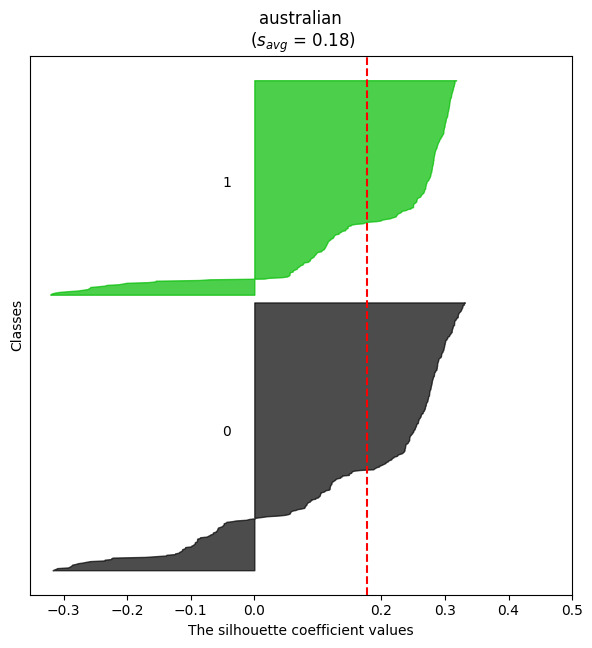

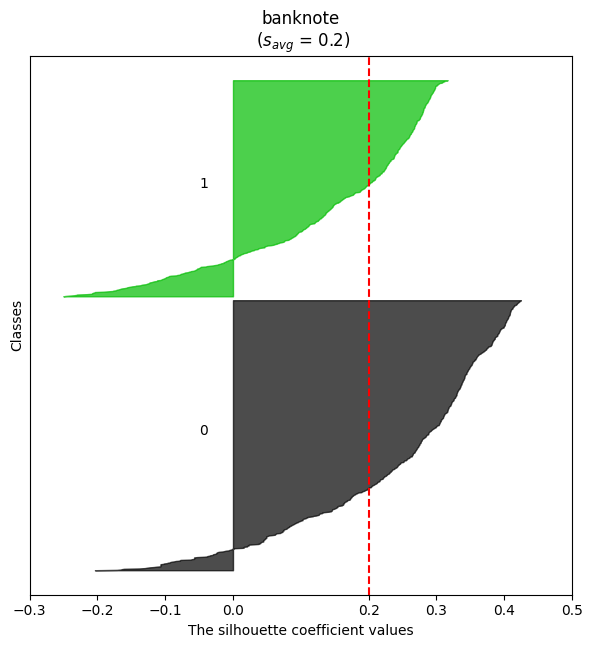

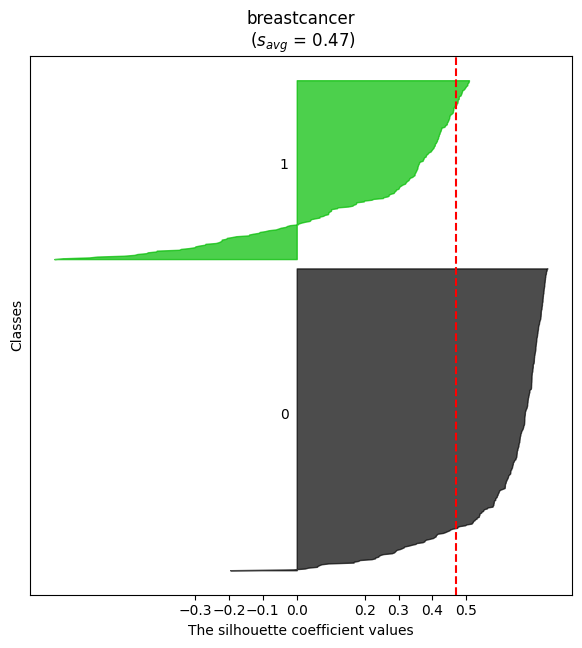

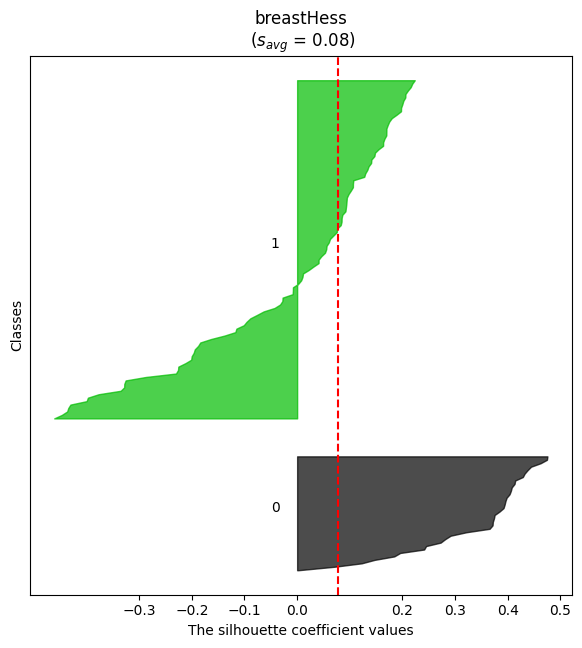

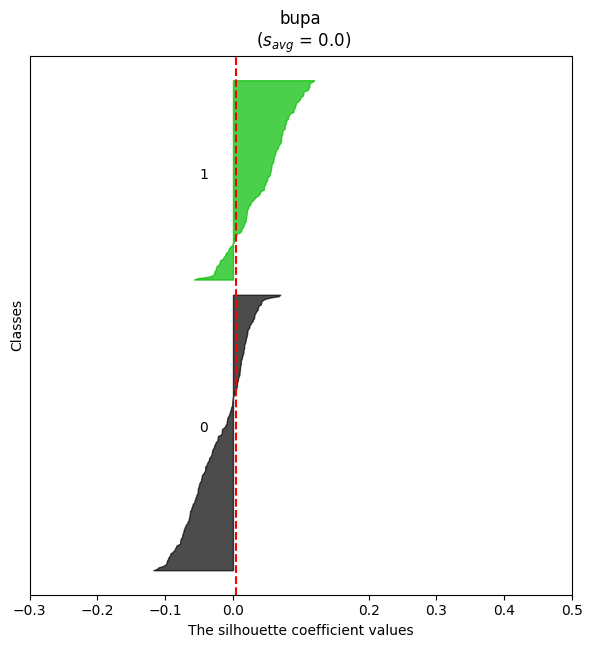

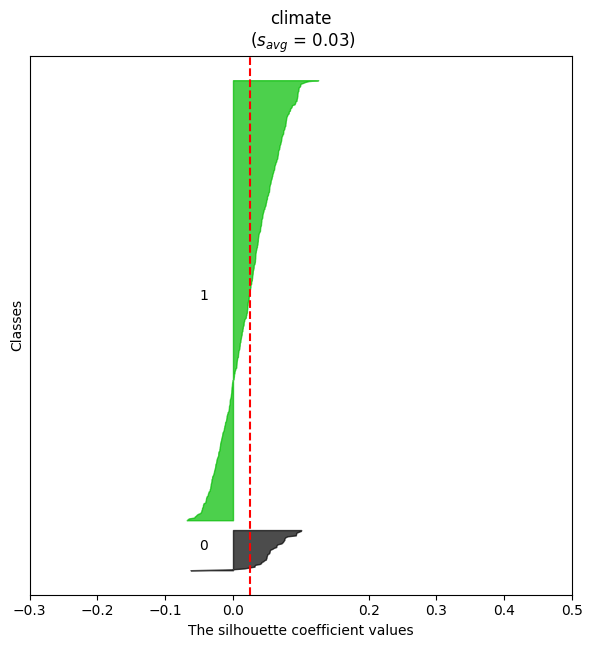

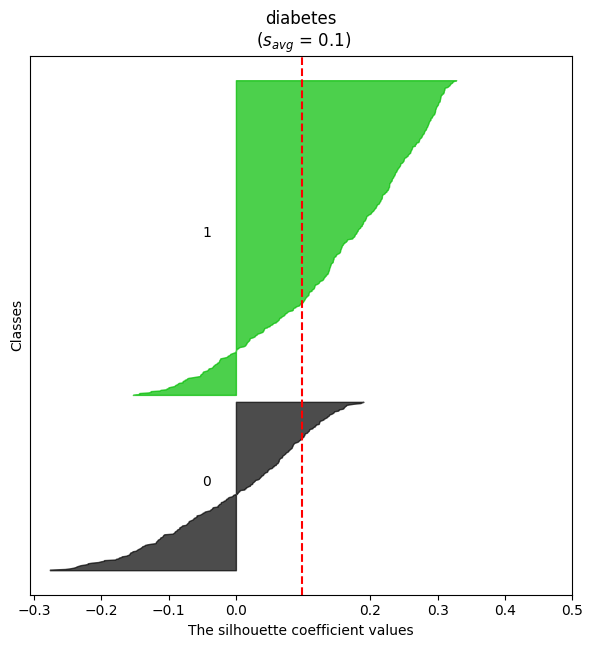

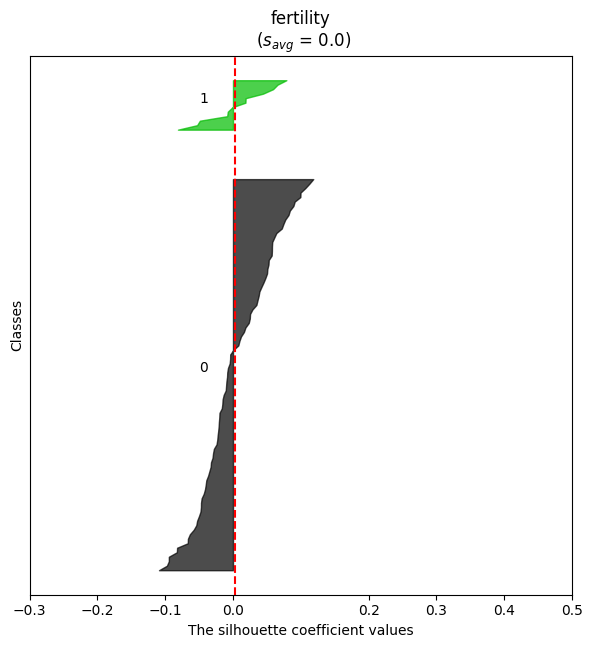

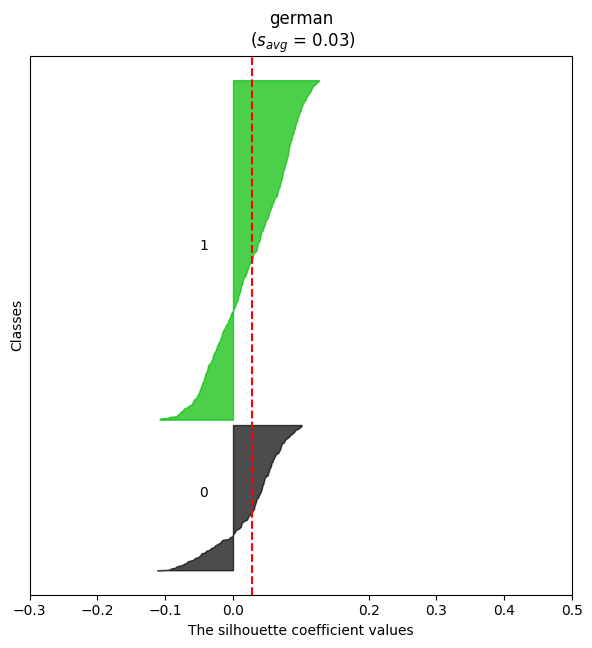

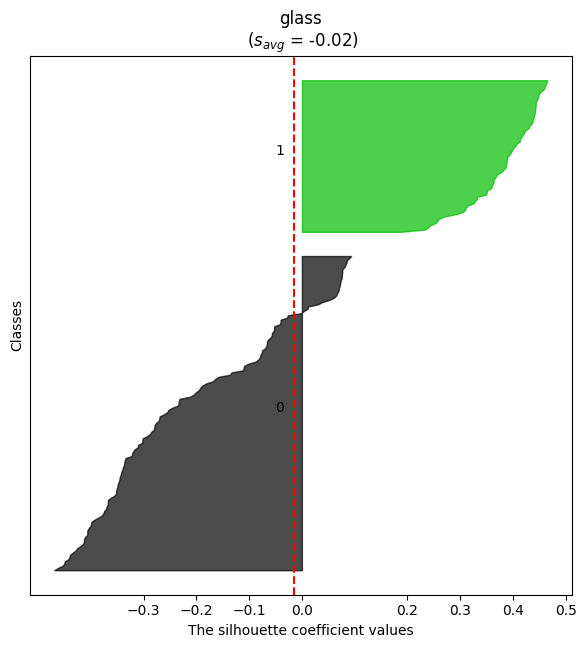

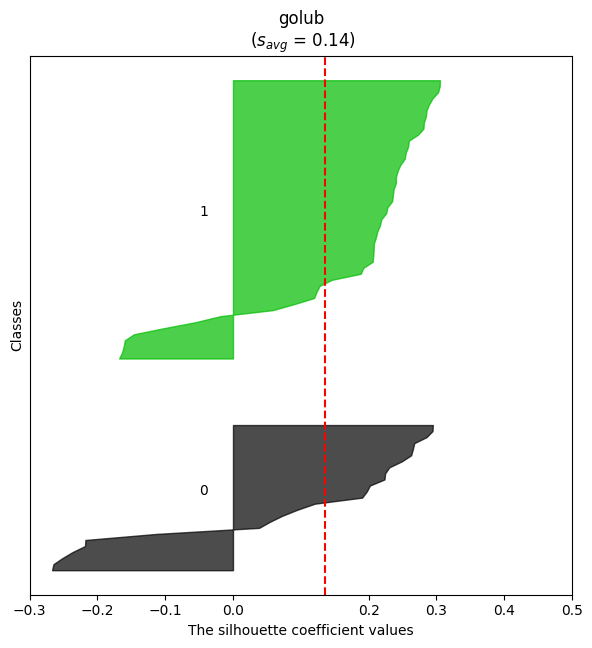

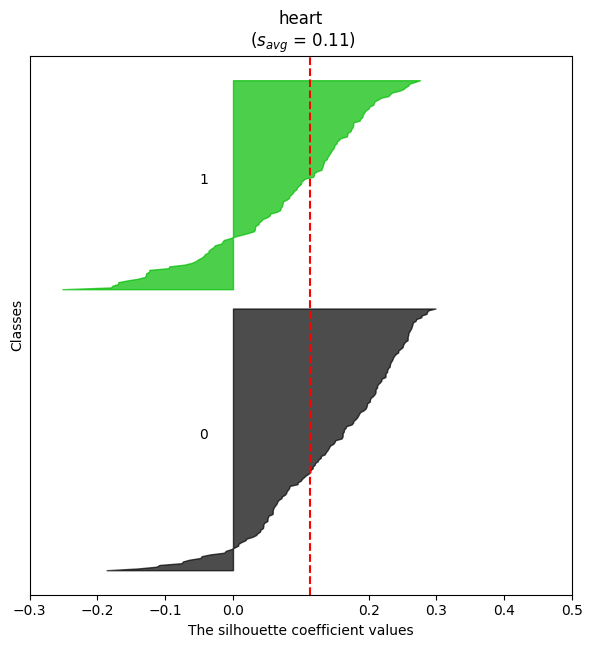

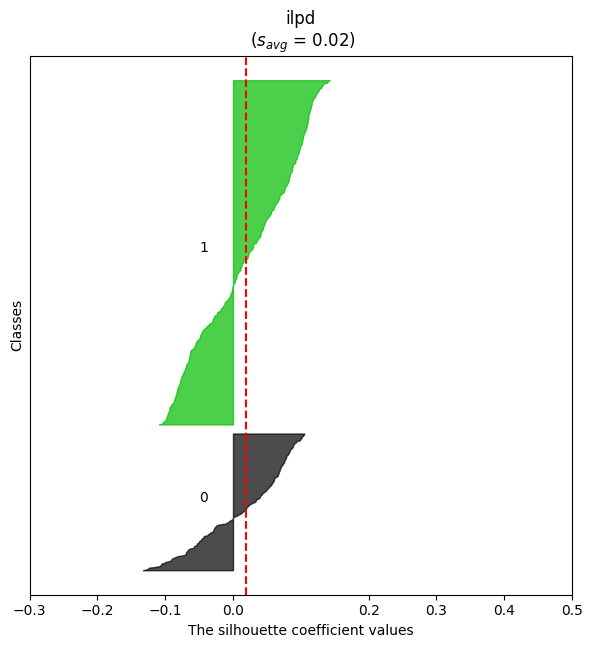

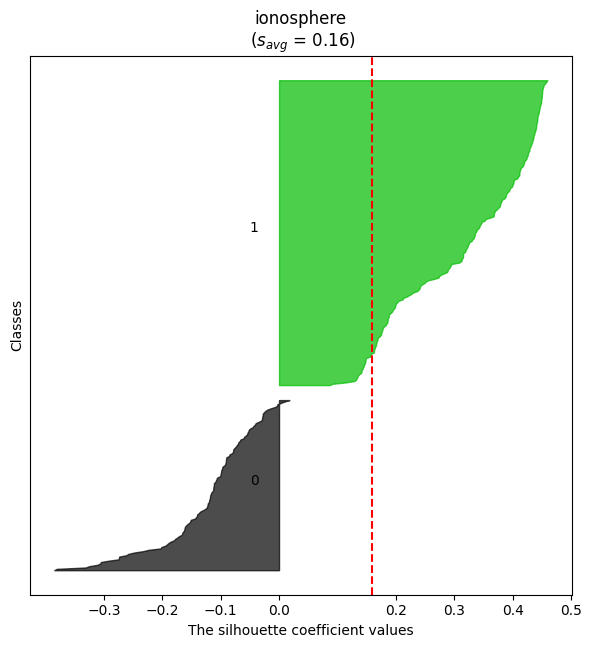

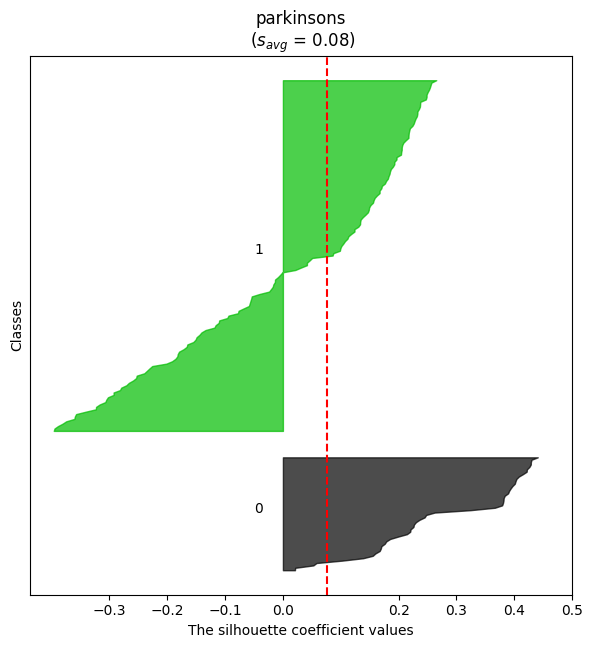

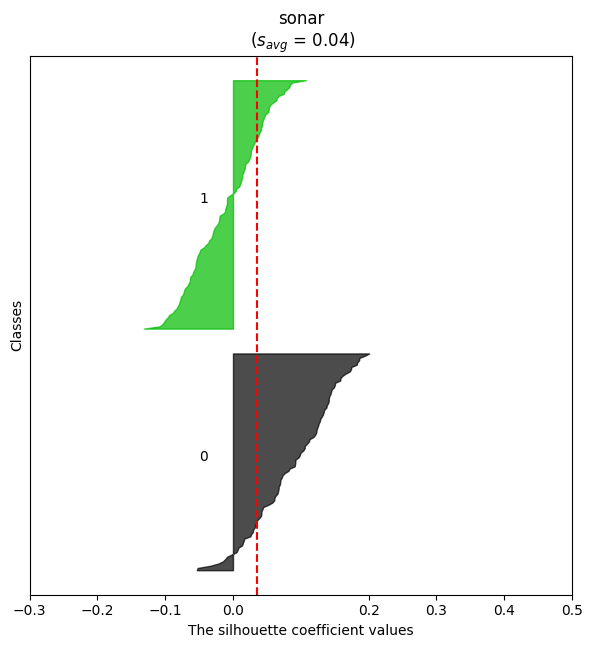

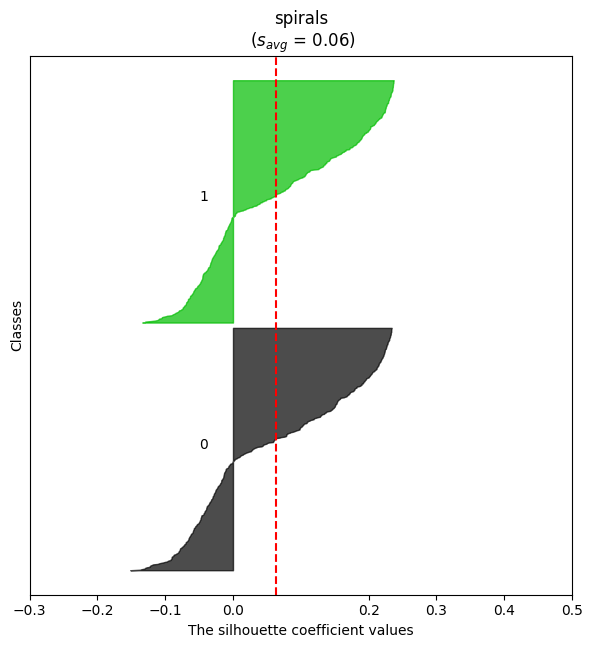

In [3]:
# datasets = ['australian','banknote','breastcancer','breastHess','bupa','climate','diabetes','fertility','german','glass','golub','haberman','heart','ilpd','ionosphere','parkinsons','sonar','spirals']
datasets = ['australian','banknote','breastcancer','breastHess','bupa','climate','diabetes','fertility','german','glass','golub','heart','ilpd','ionosphere','parkinsons','sonar','spirals']
s_avg = []
for dataset in datasets:
    n_clusters = 2
    X, Y, _ = ds.load(dataset)     
    cluster_labels = np.where(Y == -1, 0, 1)
    silhouette_avg = silhouette_score(X, Y)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 7)
    for i in range(2):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    s_avg.append(np.round(silhouette_avg,2))
    ax1.set_title(dataset + "\n ($s_{avg}$ = "+ str(np.round(silhouette_avg,2))+ ")")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Classes")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2,-0.1, 0, 0.2, 0.3, 0.4, 0.5])
    

    
    #plt.savefig("./resultados/silhouette/silhouette_"+dataset+".png", bbox_inches = 'tight', pad_inches = 0)
    # plt.show()

In [4]:
import csv
# data rows of csv file 
rows =  np.array(s_avg).reshape(-1,1)
fields = datasets
with open('results/silhouette/_silhouette_datasets.csv', '+w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(rows)

In [8]:
# datasets = ['australian','banknote','breastcancer','breastHess','bupa','climate','diabetes','fertility','german','glass','golub','haberman','heart','ilpd','ionosphere','parkinsons','sonar','spirals']
datasets = ['australian','banknote','breastcancer','breastHess','bupa','climate','diabetes','fertility','german','glass','golub','heart','ilpd','ionosphere','parkinsons','sonar','spirals']

mean_s_avg_lspace = []
std_s_avg_lspace = []
mean_s_avg_lspace_g = []
std_s_avg_lspace_g = []

for dataset in datasets:
    s_avg_lspace = []
    s_avg_lspace_g = []

    for _ in range(30):

        X, Y, _ = ds.load(dataset)     

        xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

        Phi_g = KernelOptimizer(
        kernel='gaussian',
        input_dim=X.shape[1],
        hidden_dim=40,
        output_dim=100)

        Phi_g.fit(xtrain,ytrain,n_epochs=1000, lr=0.01)
        lspace_g = Phi_g.get_likelihood_space(X).to_numpy()   
        
        
        

        Phi = KernelOptimizer(
        kernel='mlp',
        input_dim=X.shape[1],
        hidden_dim=40,
        output_dim=100)

        Phi.fit(xtrain,ytrain,n_epochs=1000, lr=0.01)
        lspace = Phi.get_likelihood_space(X).to_numpy()  


        cluster_labels = np.where(Y == -1, 0, 1)
        silhouette_avg = silhouette_score(lspace, Y)
        silhouette_avg_g = silhouette_score(lspace_g, Y)
        s_avg_lspace.append(np.round(silhouette_avg,2))
        s_avg_lspace_g.append(np.round(silhouette_avg_g,2))
    
    mean_s_avg_lspace.append(np.mean(s_avg_lspace))
    std_s_avg_lspace.append(np.std(s_avg_lspace))

    mean_s_avg_lspace_g.append(np.mean(s_avg_lspace_g))
    std_s_avg_lspace_g.append(np.std(s_avg_lspace_g))

    # sample_silhouette_values = silhouette_samples(lspace, cluster_labels)
    # y_lower = 10

    # fig, ax1 = plt.subplots(1, 1)
    # fig.set_size_inches(7, 7)
    # for i in range(2):
    #     # Aggregate the silhouette scores for samples belonging to
    #     # cluster i, and sort them
    #     ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    #     ith_cluster_silhouette_values.sort()

    #     size_cluster_i = ith_cluster_silhouette_values.shape[0]
    #     y_upper = y_lower + size_cluster_i

    #     color = cm.nipy_spectral(float(i) / n_clusters)
    #     ax1.fill_betweenx(
    #         np.arange(y_lower, y_upper),
    #         0,
    #         ith_cluster_silhouette_values,
    #         facecolor=color,
    #         edgecolor=color,
    #         alpha=0.7,
    #     )

    #     # Label the silhouette plots with their cluster numbers at the middle
    #     ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    #     # Compute the new y_lower for next plot
    #     y_lower = y_upper + 10  # 10 for the 0 samples
    
    # ax1.set_title(dataset + "\n ($s_{avg}$ = "+ str(np.round(silhouette_avg,2))+ ")")
    # ax1.set_xlabel("The silhouette coefficient values")
    # ax1.set_ylabel("Classes")

    # # The vertical line for average silhouette score of all the values
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # ax1.set_yticks([])  # Clear the yaxis labels / ticks
    # ax1.set_xticks([-0.3, -0.2,-0.1, 0, 0.2, 0.3, 0.4, 0.5])
    

australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
australian
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
banknote
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastcancer
breastHess

In [171]:
import pickle
# Open a file and use dump() 
with open('./results/silhouette/data_silhouette.pkl', 'wb') as file:           
    pickle.dump([s_avg, mean_s_avg_lspace, mean_s_avg_lspace_g, datasets, datasets_ordered], file) 

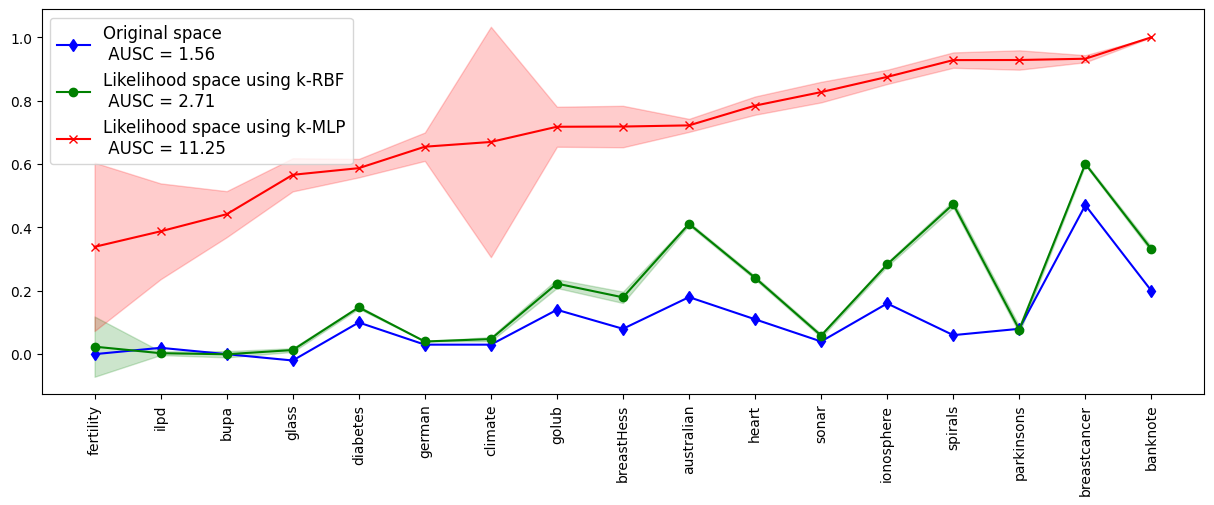

In [193]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(np.array(s_avg)[np.argsort(mean_s_avg_lspace)],'-db', label='Original space'+ "\n AUSC = " + str(np.round(auc(range(0,len(s_avg)),s_avg),2)))


ax.fill_between(range(0,len(s_avg)),np.array(mean_s_avg_lspace_g)[np.argsort(mean_s_avg_lspace)] - np.array(std_s_avg_lspace_g)[np.argsort(mean_s_avg_lspace)], np.array(mean_s_avg_lspace_g)[np.argsort(mean_s_avg_lspace)] + np.array(std_s_avg_lspace_g)[np.argsort(mean_s_avg_lspace)], alpha=0.2, color='g')



ax.plot(np.array(mean_s_avg_lspace_g)[np.argsort(mean_s_avg_lspace)],'-og', label='Likelihood space using k-RBF'+ "\n AUSC = " + str(np.round(auc(range(0,len(s_avg)),mean_s_avg_lspace_g),2)))

ax.plot(np.array(mean_s_avg_lspace)[np.argsort(mean_s_avg_lspace)],'-xr', label='Likelihood space using k-MLP' + "\n AUSC = " + str(np.round(auc(range(0,len(s_avg)),mean_s_avg_lspace),2)))

ax.fill_between(range(0,len(s_avg)),np.array(mean_s_avg_lspace)[np.argsort(mean_s_avg_lspace)] - np.array(std_s_avg_lspace)[np.argsort(mean_s_avg_lspace)], np.array(mean_s_avg_lspace)[np.argsort(mean_s_avg_lspace)] + np.array(std_s_avg_lspace)[np.argsort(mean_s_avg_lspace)], alpha=0.2, color='r')

# ax.plot(np.array(s_avg_lspace)[np.argsort(s_avg_lspace)],'-xr', label='MLP likelihood space' + "\n AUC = " + str(np.round(auc(range(0,18),s_avg_lspace),2)))

# ax.set_title('Silhouette avg')
ax.set_xticks(range(0,len(s_avg)))
ax.set_xticklabels(np.array(datasets)[np.argsort(mean_s_avg_lspace)],rotation='vertical')
ax.legend(fontsize="12")
fig.savefig("./results/silhouette/silhouette_avg_comparison_40_100.pdf", bbox_inches = 'tight', pad_inches = 0)

In [170]:
datasets_ordered = np.array(datasets)[np.argsort(mean_s_avg_lspace)][::-1]
len(datasets_ordered)
datasets_ordered

array(['banknote', 'breastcancer', 'parkinsons', 'spirals', 'ionosphere',
       'sonar', 'heart', 'australian', 'breastHess', 'golub', 'climate',
       'german', 'diabetes', 'glass', 'bupa', 'ilpd', 'fertility'],
      dtype='<U12')

## Outliers

In [9]:
import matplotlib as mpl
data2 = pd.read_csv('./dataset/heart-statlog.csv') 

data2.columns = ["age", "sex", "chest", "restbp", "schol", "fastbs", "reste",'mhra', 'eia', 'oldp','slope', 'nmvs', 'thal', 'class']
data2.describe()

,age,sex,chest,restbp,schol,fastbs,reste,mhra,eia,oldp,slope,nmvs,thal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Text(0, 0.5, 'value')

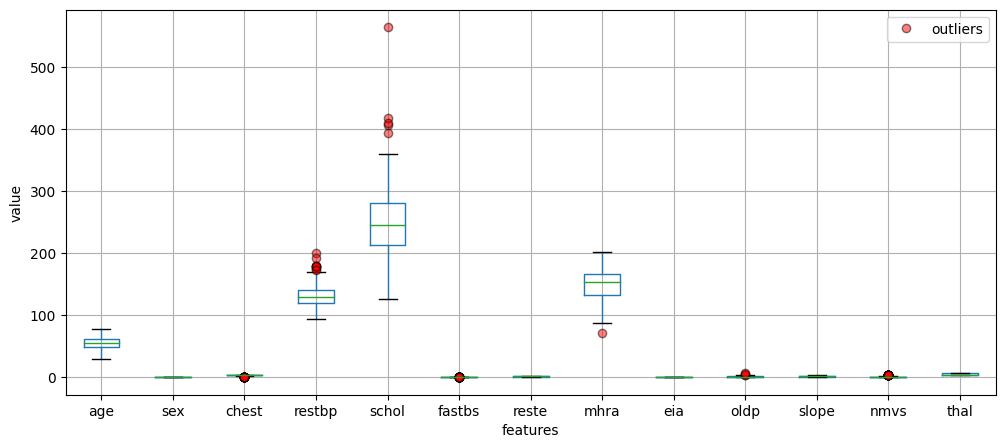

In [10]:
fig, ax = plt.subplots(figsize=(12,5))
data2.boxplot(ax=ax,flierprops=dict(markerfacecolor='r', marker='o', alpha=0.5, label='outliers'))
# where some data has already been plotted to ax
handles, labels = ax.get_legend_handles_labels()
handles = handles[0]
ax.legend(handles=[handles])
ax.set_xlabel('features')
ax.set_ylabel('value')
fig.savefig("./results/silhouette/outliers_heart.pdf", bbox_inches = 'tight', pad_inches = 0)

### CROSSTALK

In [194]:
# @nb.njit(fastmath=True)
def crosstalk(x,y):
    crosstalk = []
    normalizated = []
    for k in range(len(y)):
        ct = 0
        for j in range(len(x)):
            if j != k:
                ct += x[k,:].T.dot(x[j,:])*y[j]
            else:
                normalizated.append(x[k,:].T.dot(x[k,:])*y[k])
        crosstalk.append(ct)
    # print(crosstalk)
    crosstalk = np.array(crosstalk)
    # crosstalk = np.linalg.norm(crosstalk)
    # np.sum(np.fabs(np.sign(crosstalk) -  y))/y.shape[0]
    # #print(crosstalk)
    c = np.sum(np.fabs(np.sign(crosstalk) -  y))/y.shape[0]
    return c

In [207]:
cross = []
cross_kmlp = []
cross_kgauss = []
for ii,dataset in enumerate(datasets):
    print(ii, dataset)    
    X, Y, _ = ds.load(dataset)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)
    Phi_g = KernelOptimizer(
        kernel='gaussian',
        input_dim=X.shape[1],
        hidden_dim=40,
        output_dim=100)

    Phi = KernelOptimizer(
    kernel='mlp',
    input_dim=X.shape[1],
    hidden_dim=40,
    output_dim=100)

    Phi.fit(xtrain,ytrain)
    lspace = Phi.get_likelihood_space(xtrain).to_numpy()        

    Phi_g.fit(xtrain,ytrain)
    lspace_g = Phi_g.get_likelihood_space(xtrain).to_numpy()
    # count = np.count_nonzero(Y != 1.)
    # print(X.shape[1],Y.shape[0],np.round(count/Y.shape[0]*100,2), 100 - np.round(count/Y.shape[0]*100,2))
    a = crosstalk(X,Y)
    b = crosstalk(lspace,ytrain)
    c = crosstalk(lspace_g,ytrain)
    cross.append(a)
    cross_kmlp.append(b)
    cross_kgauss.append(c)

0 australian
australian
1 banknote
banknote
2 breastcancer
breastcancer
3 breastHess
breastHess
4 bupa
bupa
5 climate
climate
6 diabetes
diabetes
7 fertility
fertility
8 german
german
9 glass
glass
10 golub
golub
11 heart
heart
12 ilpd
ilpd
13 ionosphere
ionosphere
14 parkinsons
parkinsons
15 sonar
sonar
16 spirals
spirals


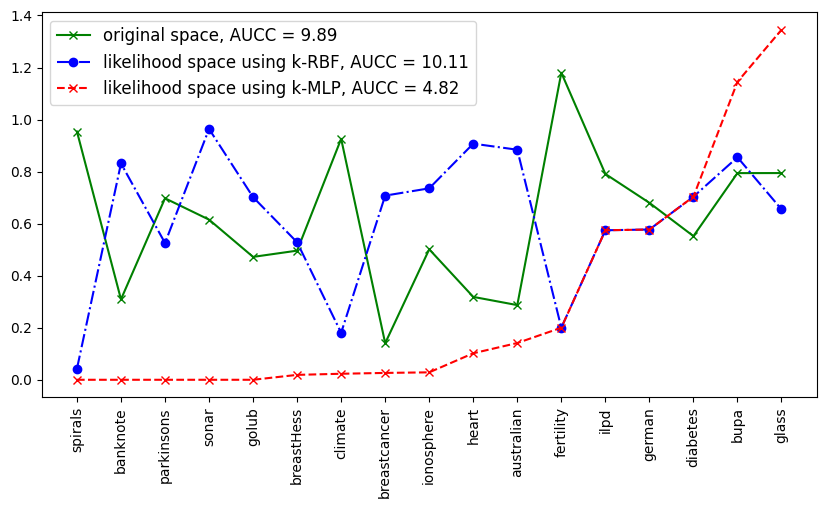

In [208]:
# fig = plt.figure(figsize=(10,5))
# ax = fig.add_subplot(111)

# # ax.plot(np.array(cross),'-gx', label='original space'+ "\n AUCC = " + str(np.round(auc(range(0,len(cross)),cross),2)))
# # ax.plot(np.array(cross_kgauss),'-.ob',label='RBF likelihood space'+ "\n area under curve = " + str(np.round(auc(range(0,len(s_avg)),mean_s_avg_lspace_g),2)))
# # ax.plot(np.array(cross_kmlp),'--rx',label='MLP likelihood space' + "\n area under curve = " + str(np.round(auc(range(0,len(s_avg)),mean_s_avg_lspace),2)))
# # ax.set_xticks(range(0,18))
# # ax.set_xticklabels(np.array(datasets),rotation='vertical')
# # ax.legend()
# # plt.savefig("./resultados/crosstalk_.pdf", bbox_inches = 'tight', pad_inches = 0)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(np.array(cross)[np.argsort(cross_kmlp)],'-gx', label='original space'+  ", AUCC = " + str(np.round(auc(range(0,len(cross)),cross),2)))
ax.plot(np.array(cross_kgauss)[np.argsort(cross_kmlp)],'-.ob',label='likelihood space using k-RBF'+ ", AUCC = " + str(np.round(auc(range(0,len(cross_kgauss)),cross_kgauss),2)))
ax.plot(np.array(cross_kmlp)[np.argsort(cross_kmlp)],'--rx',label='likelihood space using k-MLP' + ", AUCC = " + str(np.round(auc(range(0,len(cross_kmlp)),cross_kmlp),2)))
ax.set_xticks(range(0,17))
ax.set_xticklabels(np.array(datasets)[np.argsort(cross_kmlp)],rotation='vertical')
ax.legend(fontsize="12")
plt.savefig("./results/silhouette/crosstalk_sorted.pdf", bbox_inches = 'tight', pad_inches = 0)